In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import stats
import pandas as pd
import pickle
import copy
from pathlib import Path
import sys
import os
import csv

%matplotlib inline

In [3]:
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/'# basepath

#path = os.path.join(basepath,'actual_agency')
path = os.path.join(basepath,'actual_agency') #actualagency
print(path)
sys.path.append(path)

from pyanimats import *
from pyTPM import *
import actual_agency as agency

path = os.path.join('/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi') #pyphi
print(path)
sys.path.append(path)

import pyphi
from pyphi import actual, config, Direction

/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/actual_agency
/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi


In [4]:
%load_ext autoreload
%autoreload 2
%aimport pyTPM, pyanimats, actual_agency

# Lets inspect the fitness of the animats

In [5]:
# First, tell the computer where to look for files
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/Experiments/'#bathpath of MABE


In [6]:
# Get Line-of-descent (LOD) data from MABE output
path = os.path.join(basepath,'190819_1_7') #name of experiment
with open(os.path.join(path,'190819_17_LOD_data.pkl'),'rb') as f:
    LOD_data_17 = pickle.load(f)
path = os.path.join(basepath,'190821_7_1') #name of experiment
with open(os.path.join(path,'190821_71_LOD_data.pkl'),'rb') as f:
    LOD_data_71 = pickle.load(f)
path = os.path.join(basepath,'190819_1_3_15_7') #name of experiment
with open(os.path.join(path,'190819_13157_LOD_data.pkl'),'rb') as f:
    LOD_data_13157 = pickle.load(f)
path = os.path.join(basepath,'190821_1_3_15_7_3_15') #name of experiment
with open(os.path.join(path,'190821_13157315_LOD_data.pkl'),'rb') as f:
    LOD_data_13157315 = pickle.load(f)

In [7]:
# add fitness to the LOD data structure
n_runs = 10
for n in range(n_runs):
    LOD_data_17[n]['fitness'] = (LOD_data_17[n]['correct_AVE']
                               /(LOD_data_17[n]['correct_AVE']+LOD_data_17[n]['incorrect_AVE']))
    LOD_data_71[n]['fitness'] = (LOD_data_71[n]['correct_AVE']
                               /(LOD_data_71[n]['correct_AVE']+LOD_data_71[n]['incorrect_AVE']))
    LOD_data_13157[n]['fitness'] = (LOD_data_13157[n]['correct_AVE']
                               /(LOD_data_13157[n]['correct_AVE']+LOD_data_13157[n]['incorrect_AVE']))
    LOD_data_13157315[n]['fitness'] = (LOD_data_13157315[n]['correct_AVE']
                               /(LOD_data_13157315[n]['correct_AVE']+LOD_data_13157315[n]['incorrect_AVE']))

In [8]:
# inspect the LOD data for a specific LOD (run)
run = 1
LOD_data_17[run]

,update,timeToCoalescence,ID,Simple_numOffspring,alive,correct_AVE,correct_LIST,countCopy,countDelete,countIndel,...,incorrect_LIST,markovBrainDeterministicGates,markovBrainGates,markovBrain_nextNodesConnections_LIST,markovBrain_nodesConnections_LIST,optimizeValue,score_AVE,score_LIST,timeOfBirth,fitness
0,0,0,67,3,1,31.0,31,0,0,0,...,33,2,2,"0,1,0,0,1,2,0,0,1,2","3,1,0,0,0,0,0,0,0,1",0.907029,0.907029,0.907029,-1,0.484375
1,500,0,50081,1,1,44.0,44,130,114,0,...,20,3,3,"1,1,0,1,1,2,2,0,0,0","2,2,1,1,0,0,2,0,0,0",3.225100,3.225100,3.225100,499,0.687500
2,1000,0,100068,2,1,54.0,54,204,195,0,...,10,4,4,"0,2,0,0,1,1,2,0,2,1","1,5,0,2,1,0,2,0,1,0",8.557150,8.557150,8.557150,999,0.843750
3,1500,0,150072,4,1,54.0,54,320,296,0,...,10,3,3,"1,1,1,0,1,1,2,0,1,1","1,4,0,0,0,0,1,0,2,0",8.557150,8.557150,8.557150,1499,0.843750
4,2000,0,200033,2,1,57.0,57,485,459,0,...,"7,",5,5,"1,1,1,0,1,2,2,0,1,1","2,5,0,0,0,1,2,0,3,2",11.467400,11.467400,11.467400,1999,0.890625
5,2500,0,250071,3,1,59.0,59,664,627,0,...,"5,",3,3,"0,0,1,1,1,1,1,0,1,2","1,4,0,0,0,0,1,0,2,1",13.938696,13.938696,13.938696,2499,0.921875
6,3000,0,300049,3,1,61.0,61,826,811,0,...,"3,",4,4,"0,1,2,0,2,2,1,0,1,1","1,4,0,0,0,0,3,0,2,1",16.942572,16.942572,16.942572,2999,0.953125
7,3500,0,350025,2,1,61.0,61,966,944,0,...,"3,",4,4,"0,1,4,1,2,2,1,0,1,1","1,4,0,0,0,0,3,0,2,1",16.942572,16.942572,16.942572,3499,0.953125
8,4000,0,400018,3,1,61.0,61,1124,1116,0,...,"3,",3,3,"0,0,0,0,1,1,1,1,1,1","1,3,0,0,0,1,2,0,2,1",16.942572,16.942572,16.942572,3999,0.953125
9,4500,0,450014,4,1,61.0,61,1279,1276,0,...,"3,",3,3,"0,0,0,0,1,1,1,1,1,1","1,3,0,1,0,1,2,0,2,1",16.942572,16.942572,16.942572,4499,0.953125


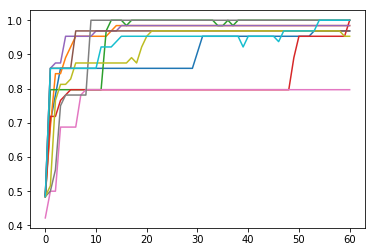

In [9]:
for i in range(10):
    plt.plot(LOD_data_17[i]['fitness'])


In [10]:
x_1 = LOD_data_17[0]['update']
y_1 = [LOD_data_17[i]['fitness'] for i in range(10)]

x_2 = LOD_data_71[0]['update']
y_2 = [LOD_data_71[i]['fitness'] for i in range(10)]

x_3 = LOD_data_13157[0]['update']
y_3 = [LOD_data_13157[i]['fitness'] for i in range(10)]

x_4 = LOD_data_13157315[0]['update']
y_4 = [LOD_data_13157315[i]['fitness'] for i in range(10)]

NameError: name 'clear_output' is not defined

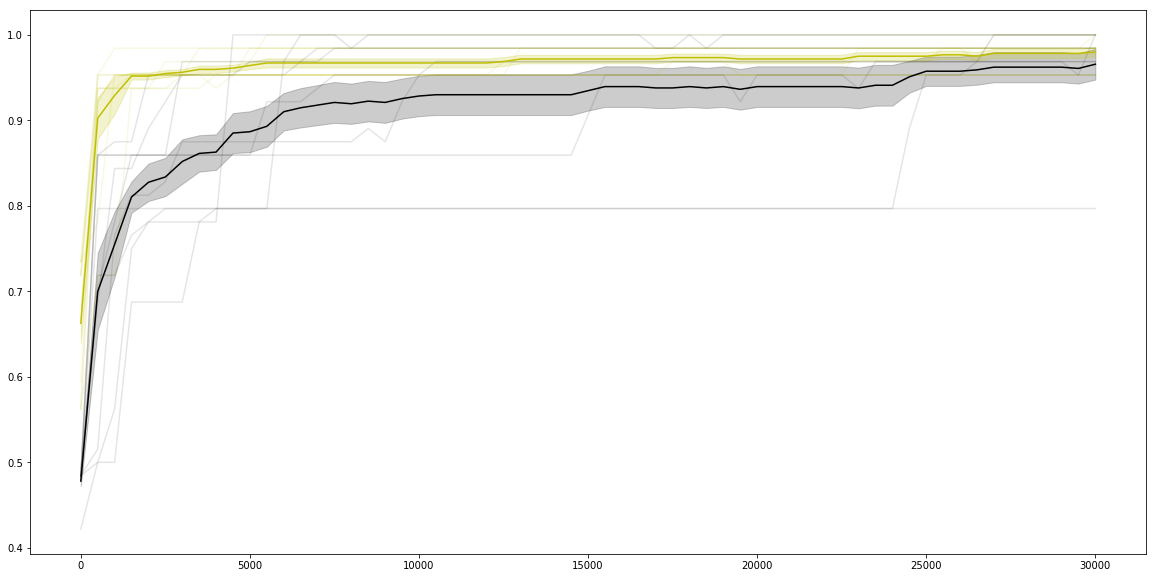

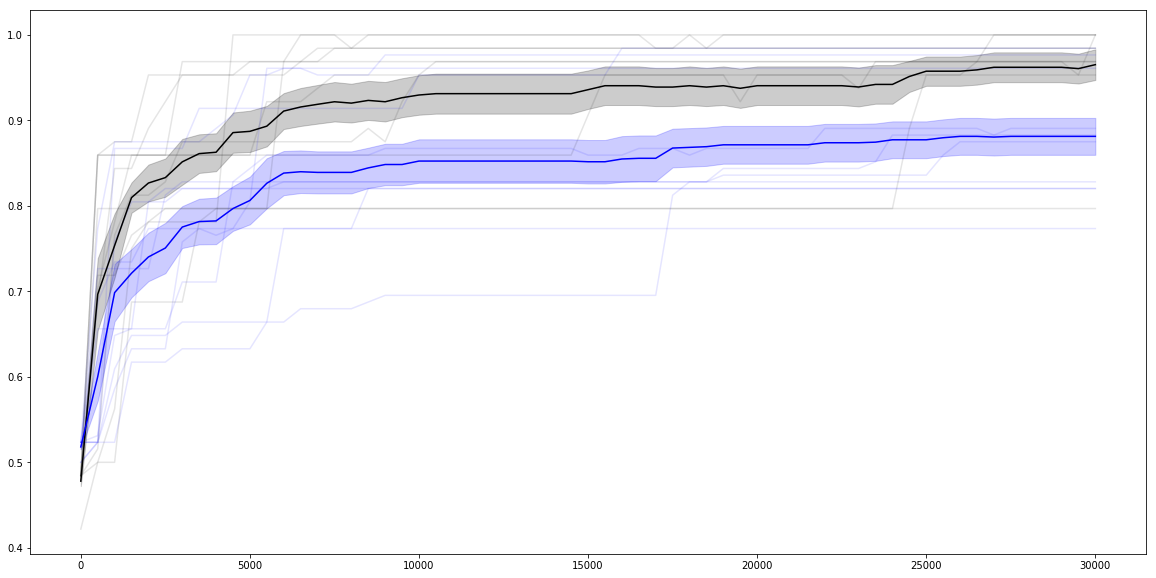

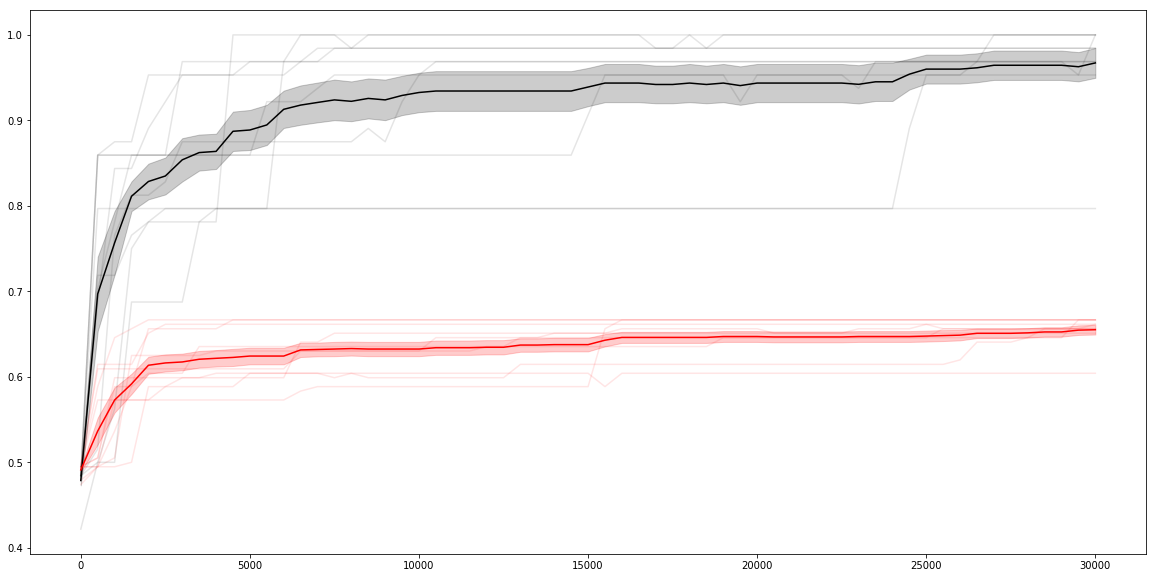

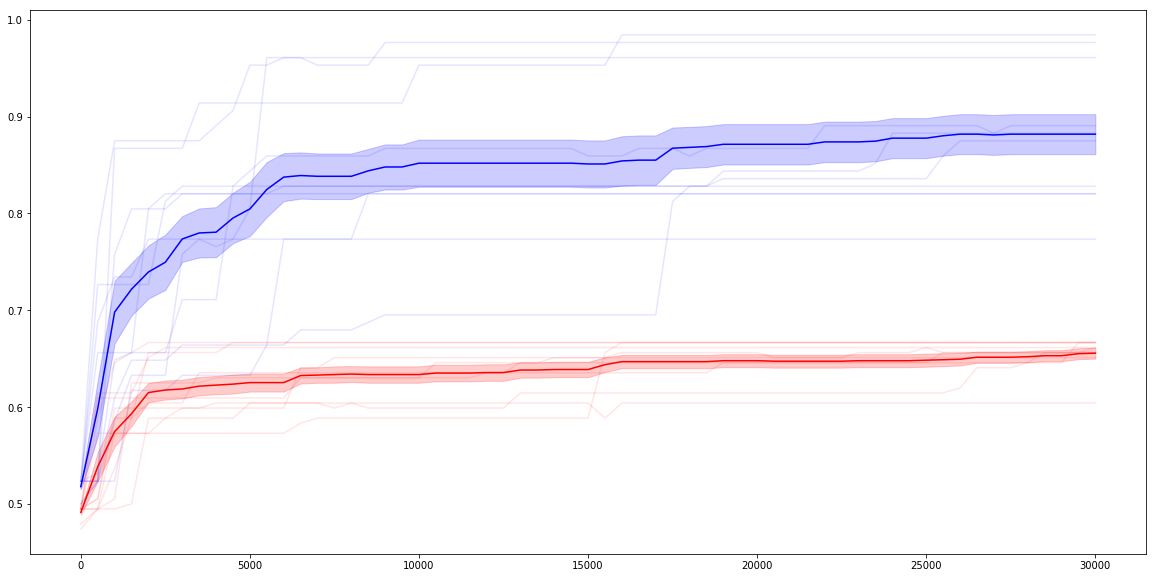

In [11]:
# Let's plot the fitness  plt.plot()

agency.plot_2LODdata_and_Bootstrap(x_1, y_1, y_2, label=['1_fitness','2_fitness'], color=['k', 'y']) # normal & easy
agency.plot_2LODdata_and_Bootstrap(x_1, y_1, y_3, label=['1_fitness','3_fitness'], color=['k', 'b']) # normal & 2 tasks
agency.plot_2LODdata_and_Bootstrap(x_1, y_1, y_4, label=['1_fitness','4_fitness'], color=['k', 'r']) # normal & 3 tasks
agency.plot_2LODdata_and_Bootstrap(x_1, y_3, y_4, label=['3_fitness','4_fitness'], color=['b', 'r']) # 2 tasks & 3 tasks


In [12]:
# inspect the fitness of a specific LOD (run)
heading = 'fitness'
LOD_data_17[run][heading][:]

from IPython.display import clear_output
clear_output()

In [13]:
# and write the values to a new list
n_agents = 61
n_runs = 10
fitness_data = [[LOD_data[r][heading][i] for i in range(n_agents)] for r in range(n_runs)]
[print(x) for x in fitness_data]

NameError: name 'LOD_data' is not defined

# Now let's look at the genome data

In [14]:

# Get the genome from our output
path = os.path.join(basepath,'190819_1_7') #name of experiment
with open(os.path.join(path,'190819_17_genome.pkl'),'rb') as f:
    all_genomes = pickle.load(f)
    


In [15]:
# make a copy csv file to analyze ex_4's last generation to test ex_1 fitness
genomes_copy = all_genomes[0].copy()
newdf=genomes_copy.drop(genomes_copy.index[[range(60)]])
#genomes_copy # show the all generations of the 1st run

/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pandas/core/indexes/base.py:3968: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [16]:
for i in range(1,10):
    aux = all_genomes[i][-1:]
    newdf = newdf.append(all_genomes[i][-1:],ignore_index=True)
df = pd.DataFrame(newdf)

In [25]:

df


,GENOME_root::_genomeLength,GENOME_root::_sites,ID,update
0,16692,"29,79,80,15,250,190,105,117,51,3,13,209,192,68...",0,30000
1,5383,"119,172,100,141,98,96,41,191,169,241,161,253,1...",1,30000
2,13168,"186,98,175,122,212,62,190,142,144,185,159,204,...",2,30000
3,15833,"213,109,0,8,189,16,103,58,162,131,213,140,245,...",3,30000
4,13865,"7,18,209,100,11,178,113,165,217,217,35,102,166...",4,30000
5,1992,"108,48,90,18,156,132,80,134,39,56,222,167,63,2...",5,30000
6,4052,"33,99,24,218,108,129,248,59,173,58,18,75,1,99,...",6,30000
7,10482,"148,16,188,13,75,140,8,225,225,42,224,15,108,7...",7,30000
8,14720,"140,232,9,154,26,4,159,205,7,136,116,232,40,19...",8,30000
9,11254,"86,166,104,130,57,116,190,180,144,5,2,84,99,10...",9,30000


In [29]:
# with open('ex4_genome.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(newdf)
#     for i in range(1, 10):
#         aux = aux.append(all_genomes[i][-1:],ignore_index=True)
#         writer.writerow(aux[i])

#     print(f.read)
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/Experiments/'#bathpath of MABE
path = os.path.join(basepath,'test_4to1')
df.to_csv('ex4_genome.csv')


In [ ]:
# we can pick the genome of one agent and parse it (make it readable for our scripts) 
run, agent = 0,60
genome = agency.get_genome(all_genomes, run, agent)

# from the genome we can reconstruct the TPM (transition probability matrix) and CM (connectivity matrix)
TPM, TPM_gates, cm = genome2TPM(genome, n_nodes=8, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)


In [ ]:
# then we can inspect the TPM
[print(x) for x in TPM] 

In [ ]:
TPM_gates

In [ ]:
# and also the connectivity matrix (CM)
print(cm)

# Last part of the output is the activity pattern

In [ ]:
# First get the data from our MABE output
with open(os.path.join(path,'190819_17_activity.pkl'),'rb') as f:
    activity = pickle.load(f)
    

In [ ]:
# reformat the activity to a single list for each trial
brain_activity = []
for r in range(n_runs):
    brain_activity.append(agency.getBrainActivity(activity[r], n_agents))

In [ ]:
# inspect activity for a given run, agent, and trial
run = 0
agent = 60
trial = 2
print(brain_activity[run][agent][trial])

In [ ]:
run, agent, wait = 0,20,4
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(brain_activity[run][agent][0+wait])
plt.subplot(1,4,2)
plt.imshow(brain_activity[run][agent][16+wait])
plt.subplot(1,4,3)
plt.imshow(brain_activity[run][agent][32+wait])
plt.subplot(1,4,4)
plt.imshow(brain_activity[run][agent][48+wait])

# The next step is doing some actual causation analysis

In [ ]:
# let's analyse the actual causes of the motor occurences for the animat in one trial
run, agent, trial, occ = 0, 20, 52, 15

# First we can inspect the occurrences
X,Y = agency.get_occurrences(np.array(brain_activity[run][agent]),numSensors=2,numHidden=4,numMotors=2)
print('transition from {} to {}'.format(X[trial][occ],Y[trial][occ]))

In [ ]:
# to actually do the AC analysis we must first define a network for pyphi
network = pyphi.network.Network(np.array(TPM), cm=np.array(cm), 
            node_labels=('S1','S2','M1','M2','H1','H2','H3','H4'), purview_cache=None)


In [ ]:
print(network)

In [ ]:
ba = np.array()

In [ ]:
# now we can run a script for calculating the direct causes of all motor occurrences
purview, alpha, motorstate, transitions, account = agency.AnalyzeTransitions(
            network, brain_activity[run][agent][trial], 
            cause_indices=[0,1,4,5,6,7], effect_indices=[2,3],
            sensor_indices=[0,1], motor_indices=[2,3])


In [ ]:
motorstate

In [ ]:
(brain_activity[run][agent][trial]).shape

In [ ]:
# Now we can inspect the causal account and other output of AC analysis for all unique transitions in the trial!
t = 3
print('transition from {} to {}'.format(transitions[t][0],transitions[t][1]))
print('state of the motors was:')
print(motorstate[t])
print('the indices for the elements in the cause of the higher order occurrence was: ')
print(purview[t])
print('the irreducibility of the higher order cause was:')
print(alpha[t])
print(account[t])


In [ ]:
print(account)

In [ ]:
len(account)